In [1]:
import pandas as pd

# Fear & Greed dataset
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf&export=download"
sentiment = pd.read_csv(sentiment_url)

# Hyperliquid trader data
traders_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs&export=download"
traders = pd.read_csv(traders_url)

# Check first few rows
sentiment.head()
traders.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [2]:
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
traders['time'] = pd.to_datetime(traders['time'])
traders['date'] = traders['time'].dt.date
traders['date'] = pd.to_datetime(traders['date'])


KeyError: 'Date'

In [3]:
traders['Timestamp IST'] = pd.to_datetime(traders['Timestamp IST'], format='%d-%m-%Y %H:%M')
# Create a date column for daily aggregation
traders['date'] = traders['Timestamp IST'].dt.date
traders['date'] = pd.to_datetime(traders['date'])


In [4]:
agg = traders.groupby('date').agg(
    total_volume_usd=('Size USD', 'sum'),
    total_trades=('Account', 'count'),
    avg_closedPnL=('Closed PnL', 'mean'),
    win_rate=('Closed PnL', lambda x: (x > 0).mean())
).reset_index()

agg.head()


,date,total_volume_usd,total_trades,avg_closedPnL,win_rate
0,2023-05-01,477.00,3,0.000000,0.000000
1,2023-12-05,50005.83,9,0.000000,0.000000
2,2023-12-14,113203.35,11,-18.675885,0.363636
3,2023-12-15,10609.95,2,-12.316017,0.000000
4,2023-12-16,15348.77,3,0.000000,0.000000


In [6]:
sentiment['date'] = pd.to_datetime(sentiment['Date'])

KeyError: 'Date'

In [7]:
sentiment = pd.read_csv('/content/fear_greed_index.csv')
sentiment['Date'] = pd.to_datetime(sentiment['Date'])

merged = agg.merge(sentiment.rename(columns={'Date':'date'}), on='date', how='left')
merged.head()


KeyError: 'Date'

In [8]:
sentiment = pd.read_csv('path_to_fear_greed.csv')
print(sentiment.columns)



FileNotFoundError: [Errno 2] No such file or directory: 'path_to_fear_greed.csv'

In [9]:
sentiment = pd.read_csv('/content/fear_greed_index.csv')
print(sentiment.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [10]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
merged = agg.merge(sentiment, on='date', how='left')


In [11]:
sentiment.head()
agg.head()


,date,total_volume_usd,total_trades,avg_closedPnL,win_rate
0,2023-05-01,477.00,3,0.000000,0.000000
1,2023-12-05,50005.83,9,0.000000,0.000000
2,2023-12-14,113203.35,11,-18.675885,0.363636
3,2023-12-15,10609.95,2,-12.316017,0.000000
4,2023-12-16,15348.77,3,0.000000,0.000000


In [12]:
merged = agg.merge(sentiment, on='date', how='left')
merged.head()


,date,total_volume_usd,total_trades,avg_closedPnL,win_rate,timestamp,value,classification
0,2023-05-01,477.00,3,0.000000,0.000000,1.682919e+09,63.0,Greed
1,2023-12-05,50005.83,9,0.000000,0.000000,1.701754e+09,75.0,Extreme Greed
2,2023-12-14,113203.35,11,-18.675885,0.363636,1.702532e+09,72.0,Greed
3,2023-12-15,10609.95,2,-12.316017,0.000000,1.702618e+09,70.0,Greed
4,2023-12-16,15348.77,3,0.000000,0.000000,1.702705e+09,67.0,Greed


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.lineplot(data=merged, x='date', y='avg_closedPnL', hue='Classification')
plt.title('Average PnL by Market Sentiment (Fear vs Greed)')
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret value `Classification` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x500 with 0 Axes>

In [14]:
print(merged.columns)


Index(['date', 'total_volume_usd', 'total_trades', 'avg_closedPnL', 'win_rate',
       'timestamp', 'value', 'classification'],
      dtype='object')


In [15]:
merged.rename(columns={'classification':'Classification'}, inplace=True)


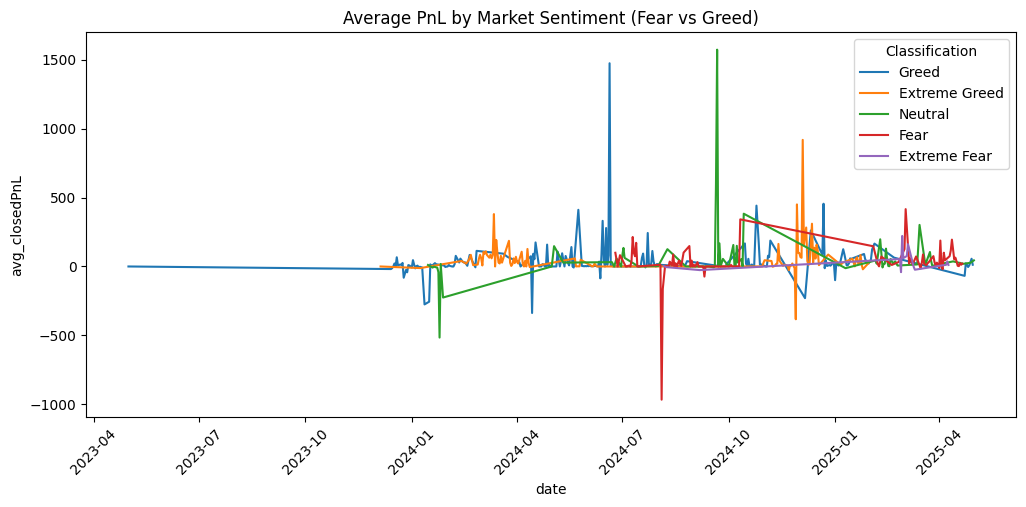

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.lineplot(data=merged, x='date', y='avg_closedPnL', hue='Classification')
plt.title('Average PnL by Market Sentiment (Fear vs Greed)')
plt.xticks(rotation=45)
plt.show()



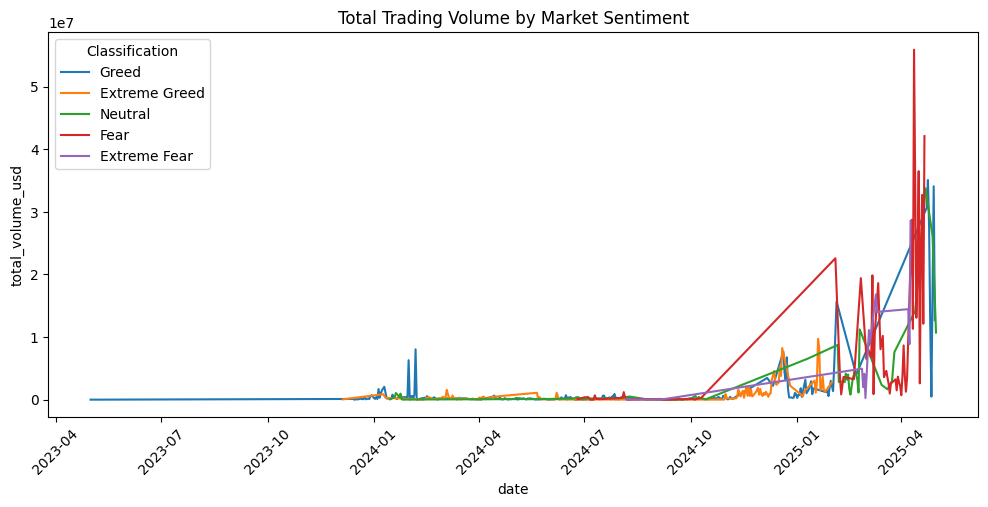

In [17]:
plt.figure(figsize=(12,5))
sns.lineplot(data=merged, x='date', y='total_volume_usd', hue='Classification')
plt.title('Total Trading Volume by Market Sentiment')
plt.xticks(rotation=45)
plt.show()
